In [ ]:
__version__ = '20180807' #Revised version
#__version__ = '20180806' #Launched version

In [1]:
# std. lib
import sys
sys.path.append('../../../hypercat/hypercat/')

# 3rd party
import pylab as plt

# hypercat
import hypercat
import plotting
import bigfileops as bfo
import ioops
import interferometry

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
###----------------HDF file dir-------------------###
#hdffile = '/YOUR_HDF_FILEPATH/hypercat_20180417.hdf5'
hdffile = '/Volumes/Seagate Backup Plus Drive/hypercat/hypercat_20180417.hdf5'
imgcube = hypercat.ModelCube(hdffile, hypercube='imgdata', subcube_selection='minimal')

Opening HDF5 file: /Volumes/Seagate Backup Plus Drive/hypercat/hypercat_20180417.hdf5 
Loading sampling parameters.
Closing HDF5 file.
Loading  hypercube 'imgdata' [shape: (5,10,16,12,5,7,19,121,241)] to RAM (693.51 GB required) ...
Inspect the loaded hypercube with .print_sampling()

-------------------------------------------------------
Parameter  Range                Nvalues  Sampled values
-------------------------------------------------------
 sig*    [ 15.000 -  75.000]  (  5)    15.000, 30.000, 45.000, 60.000, 75.000
   i*    [  0.000 -  90.000]  ( 10)     0.000, 10.000, 20.000, 30.000, 40.000, 50.000, 60.000, 70.000, 80.000, 90.000
   Y*    [  5.000 -  20.000]  ( 16)     5.000,  6.000,  7.000,  8.000,  9.000, 10.000, 11.000, 12.000, 13.000, 14.000, 15.000, ...
   N*    [  1.000 -  12.000]  ( 12)     1.000,  2.000,  3.000,  4.000,  5.000,  6.000,  7.000,  8.000,  9.000, 10.000, 11.000, ...
   q*    [  0.000 -   2.000]  (  5)     0.000,  0.500,  1.000,  1.500,  2.000
  tv*    [

In [89]:
sig, i, Y, N, q, tv, wave = 43, 55, 18, 4, 0.08, 70, 12.0  # example parameters, here e.g. for NGC1068 from Lopez-Rodriguez+2018
vec = (sig, i, Y, N, q, tv, wave) #The order of the parameter set is also important...
#list of the parameters
Lbol = '1.6e45 erg/s' #the unit Lsun is also available. Is is used only for calculating dust sublimation radius
D = '14.4 Mpc'
PA = '-42 deg' #PA is optional
objectname = 'ngc1068' #objectname is optional

Squeezing all dim-1 axes...
Instantiating n-dim interpolation object ...
Done.
Rotated image (see self.data) by -42.0 deg in direction 'NE'.
Coordinates for source 'ngc1068' resolved. WCS created.
Plotting panel (0,0)


(<matplotlib.figure.Figure at 0xae6ee74780>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0xae736ff9b0>]],
       dtype=object))

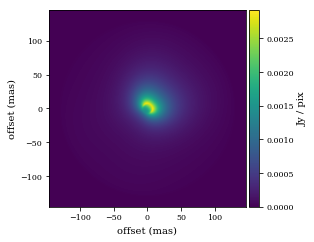

In [90]:
ngc1068 = hypercat.Source(imgcube,luminosity=Lbol,distance=D,pa=PA,objectname=objectname)
sky = ngc1068(vec,total_flux_density='6.193 Jy')
plotting.multiplot(sky)

# Interferometric observations

In [86]:
oifilename = 'NGC1068.oifits' #from Burtscher+13 

In [91]:
#Create 2D FFT of clumpy torus image
ori_fft = interferometry.ima2fft(sky)
#Obtain pixel scale
fftscale = interferometry.fft_pxscale(sky)
#Obtain observational data from oifile
u,v, cf, cferr, pa_obs, paerrr_obs, \
amp_obs, amperr_obs, wave = interferometry.uvload(oifilename)
#obsertain corrflux from observations from Burtscher+13 
wave_cut =  12.05 #in microns
cf_obs, cferr_obs = interferometry.getObsPerWave(u[:32],v[:32],cf,cferr,wave,wave_cut)
#Obtain correlated flux from Synthetic observations usong CLUMPY images
corrflux, BL, Phi = interferometry.correlatedflux(ori_fft,u,v)
#obtain image fom fft
ori_ifft = interferometry.ima_ifft(ori_fft,u,v)

Pixel scale in FFT image is:  8.502721675473474  m (Baseline) per pixel


(0.01, 16)

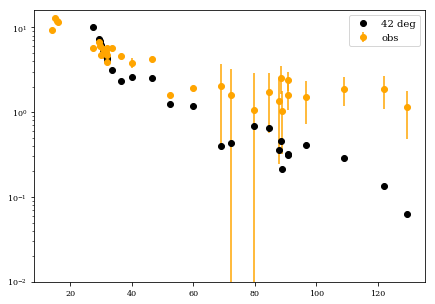

In [92]:
import numpy as np


BBL = BL[:32]
#print(cf_obs.shape)
idx = np.argsort(BBL)

fig, ax0 = plt.subplots(1,1,figsize=(7,5))
ax0.plot(BBL[idx],corrflux[idx],'o',color='black',label='42 deg')
#ax0.plot(BBL[idx],corrflux0[idx],'s',color='blue',label='0 deg')
#ax0.plot(BBL[idx],corrflux42[idx],'x',color='red',label='-42 deg')
ax0.errorbar(BBL[idx],cf_obs[idx[:32]],yerr=cferr_obs,fmt='o',color='orange',label='obs')


ax0.legend()
ax0.set_yscale('log')
ax0.set_ylim([0.01,16])


(0, 120)

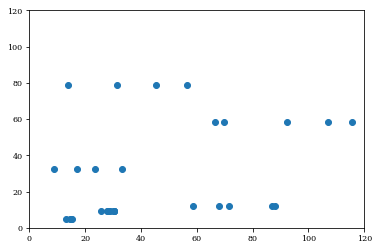

In [31]:
plt.plot(u,v,'o')